In [1]:
# Sentiment Analysis using Twitter

In [2]:
# Libraries used
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [3]:
APIKey="45bClwJKA7A9oYkpwznWeExpR"
APISecretKey="2ZCUH8pWC1edht76JctAs3Ws8iWhVE4yONXyQJhFLh8gERxDLz"
AccessToken="948758986366451712-KAuqMqjvAGuzvai3JBtNduvuOaQAyXs"
AccessTokenSecret="37EpjIW2W9IEODtTYelTxPkWP3zGSGSqPuAerZTMw1RLg"

In [4]:
authenticate = tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(authenticate)

In [5]:
posts = api.user_timeline(screen_name = 'Thorin', count = 1000, lang = 'eg', tweet_mode = 'extended')
i = 1
for tweet in posts: 
  print(str(i) +') ' + tweet.full_text + '\n')
  i+=1

1) There's still time to get 20% off an order of GamerSupps with my code THORIN.

One of the most enduring flavours I've found is Dragon Fruit Punch.  I still like it months later.

Offer ends once the weekend is over!

https://t.co/V7ttcjN1Xp

2) #LPL wants to win Worlds.

#LCK wants to win Worlds playing in a way that makes sense to them.

#LEC wants to have a chance to win Worlds playing the way they play in LEC.

#LCS just says they want to win Worlds.

3) RT @nelson_sng: If I had to give an analogy, league is similar to exams

You have to study 3 textbooks for the exam

EU before Worlds: Stud…

4) RT @808sAndFades: https://t.co/IvXPNa9Q7q

5) It'll all be fun and games until you have the first broadcast talent commit suicide during an on going event.

I won't say that will be the moment people learn because I've seen the performative decrying that occurs then and that it has no lasting effect.

6) Telling these people nonsense NPC responses like "well you're getting paid lots of m

In [6]:
df = pd.DataFrame([tweet.full_text for tweet in posts],columns = ['Tweets'])
df

,Tweets
0,There's still time to get 20% off an order of ...
1,#LPL wants to win Worlds.\n\n#LCK wants to win...
2,"RT @nelson_sng: If I had to give an analogy, l..."
3,RT @808sAndFades: https://t.co/IvXPNa9Q7q
4,It'll all be fun and games until you have the ...
...,...
195,RT @biglittlevideo: Want to edit for @BLASTtv ...
196,As much as @tomi and I laughed at @cArn at the...
197,They don't care about you. Take care of yourse...
198,It would be cool if the really big events in C...


In [7]:
def cleanText(text):
  text = re.sub('@[AaZa-z0-9]+','',text) #removing mentions
  text = re.sub("#",'',text)  #removing #
  text = re.sub('Rt[\s]+','',text)  #removing Retweets
  tezt = re.sub('https?:\/\/\S+','',text)  #removing links
  return text

In [8]:
df['Tweets'] = df['Tweets'].apply(cleanText)

In [9]:
df

,Tweets
0,There's still time to get 20% off an order of ...
1,LPL wants to win Worlds.\n\nLCK wants to win W...
2,"RT _sng: If I had to give an analogy, league i..."
3,RT Fades: https://t.co/IvXPNa9Q7q
4,It'll all be fun and games until you have the ...
...,...
195,RT : Want to edit for @BLASTtv @BLASTPremier? ...
196,As much as and I laughed at at the time it d...
197,They don't care about you. Take care of yourse...
198,It would be cool if the really big events in C...


In [10]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of all the tweets
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [11]:
df

,Tweets,Subjectivity,Polarity
0,There's still time to get 20% off an order of ...,0.250000,0.250000
1,LPL wants to win Worlds.\n\nLCK wants to win W...,0.271429,0.542857
2,"RT _sng: If I had to give an analogy, league i...",0.400000,0.000000
3,RT Fades: https://t.co/IvXPNa9Q7q,0.000000,0.000000
4,It'll all be fun and games until you have the ...,0.177778,0.183333
...,...,...,...
195,RT : Want to edit for @BLASTtv @BLASTPremier? ...,0.000000,0.000000
196,As much as and I laughed at at the time it d...,0.400000,0.471429
197,They don't care about you. Take care of yourse...,0.000000,0.000000
198,It would be cool if the really big events in C...,0.440476,0.085714


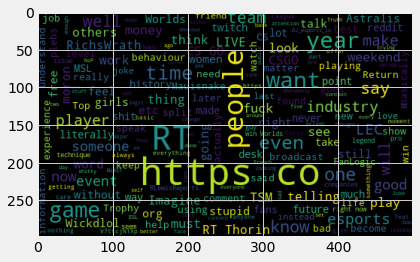

In [12]:
# Word Cloud Visualization
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width = 500, height = 300, random_state = 0, max_font_size = 50).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [13]:
# create a funtion to compute negative, neutral and positive 

def gteAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(gteAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,There's still time to get 20% off an order of ...,0.250000,0.250000,Positive
1,LPL wants to win Worlds.\n\nLCK wants to win W...,0.271429,0.542857,Positive
2,"RT _sng: If I had to give an analogy, league i...",0.400000,0.000000,Neutral
3,RT Fades: https://t.co/IvXPNa9Q7q,0.000000,0.000000,Neutral
4,It'll all be fun and games until you have the ...,0.177778,0.183333,Positive
...,...,...,...,...
195,RT : Want to edit for @BLASTtv @BLASTPremier? ...,0.000000,0.000000,Neutral
196,As much as and I laughed at at the time it d...,0.400000,0.471429,Positive
197,They don't care about you. Take care of yourse...,0.000000,0.000000,Neutral
198,It would be cool if the really big events in C...,0.440476,0.085714,Positive


In [14]:
df['Analysis'].value_counts()

Positive    95
Neutral     59
Negative    46
Name: Analysis, dtype: int64

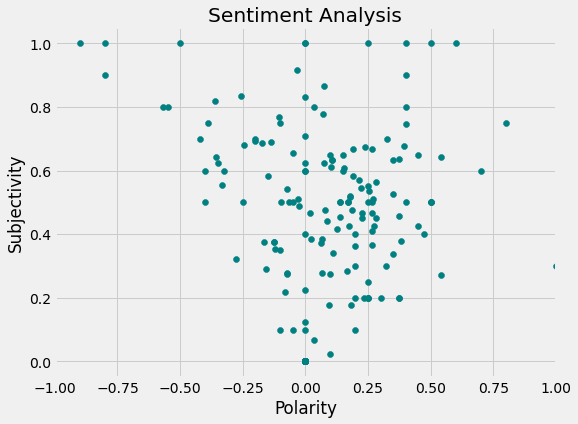

In [15]:
# plotting the scatter plot
plt.figure(figsize = (8,6))

for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Teal')

plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [16]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
2,"RT _sng: If I had to give an analogy, league i...",0.400000,0.0,Neutral
3,RT Fades: https://t.co/IvXPNa9Q7q,0.000000,0.0,Neutral
6,One thing I had hoped to implement at Flashpoi...,0.000000,0.0,Neutral
8,RT @JaromeBellVA: 10 out of 10 scientists agre...,0.000000,0.0,Neutral
12,"RT @FitFounder: When you're in doubt, workout",0.000000,0.0,Neutral
13,Telling people their tone increases the freque...,0.625000,0.0,Neutral
15,Tonight I'll be hosting a Watch Party for TSM ...,0.600000,0.0,Neutral
22,RT @OfPeriander: https://t.co/bpQsvlhNfk,0.000000,0.0,Neutral
24,RT : https://t.co/XMB1Hq4xIi,0.000000,0.0,Neutral
25,RT @Lukewearechange: Don’t be a hoe for the es...,0.000000,0.0,Neutral


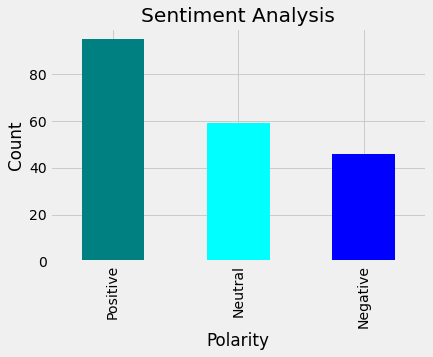

In [17]:
# bar graphs

df['Analysis'].value_counts().plot(kind='bar',color=['teal', 'cyan', 'blue'])
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()